In [9]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizer_v2 import adam
from keras import regularizers
from matplotlib import pyplot as plt

# 准备数据

In [10]:
df=pd.read_csv('iris_full.csv')
data = np.array(df)

X = data[0:,1:5]
Y = data[0:,-1]

np.random.shuffle(data)

num_training_samples = 120

x_train = data[0:num_training_samples,1:5].astype(float)
y_train = data[0:num_training_samples,-1]
x_test = data[num_training_samples:150,1:5].astype(float)
y_test = data[num_training_samples:150,-1]
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(y_train)  #将3个字母转化为 0 0 1 之类的。
y_train = np_utils.to_categorical(Y_encoded)

# 模型1的建立、训练与测试
- 隐藏层 **1\*10**
- 激活函数 **relu**
- 优化算法 **Adam优化器**
- 输出层 **1\*3**
- 激活函数 **softmax**

Epoch 1/50
6/6 [==============================] - 0s 1ms/step - loss: 2.0752 - accuracy: 0.3667
Epoch 2/50
6/6 [==============================] - 0s 798us/step - loss: 1.5639 - accuracy: 0.3667
Epoch 3/50
6/6 [==============================] - 0s 798us/step - loss: 1.2549 - accuracy: 0.3667
Epoch 4/50
6/6 [==============================] - 0s 1ms/step - loss: 1.1113 - accuracy: 0.3667
Epoch 5/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0665 - accuracy: 0.3667
Epoch 6/50
6/6 [==============================] - 0s 997us/step - loss: 1.0576 - accuracy: 0.4167
Epoch 7/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0465 - accuracy: 0.5750
Epoch 8/50
6/6 [==============================] - 0s 957us/step - loss: 1.0214 - accuracy: 0.4583
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 0.9941 - accuracy: 0.3750
Epoch 10/50
6/6 [==============================] - 0s 997us/step - loss: 0.9495 - accuracy: 0.3667
Epoch 11/50
6/6 [============

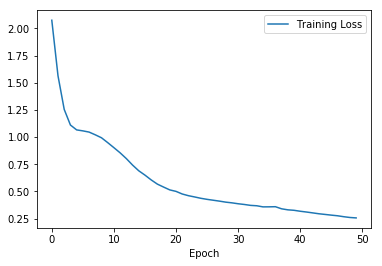

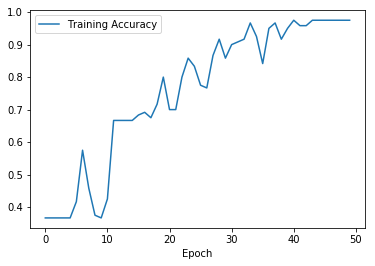

In [13]:
# 构建模型
model = Sequential()
#添加第一个隐藏层，包括10个神经元、使用relu激活函数
model.add(Dense(10,activation='relu',input_dim=4))
# 添加输出层，包括3个神经元（即3个类别），使用softmax激活函数
model.add(Dense(3, activation='softmax'))

# 编译模型，使用Adam优化器、分类交叉熵损失函数和精度评估指标
model.compile(optimizer=adam.Adam(learning_rate=0.008), loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train,  epochs=50, batch_size=20,verbose =1)


# 绘制训练过程中的损失和准确率变化曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
# 对新的图像进行分类预测
predictions = model.predict(x_test)

# 输出预测结果
num = 0
for i in range(len(predictions)):
    if np.argmax(predictions[i]) == y_test[i]:
        num = num + 1
print(f'test_accuracy = {num/len(predictions)}')

test_accuracy = 0.9333333333333333


# 模型2的建立、训练与测试
- 隐藏层 **1\*10+1\*10**
- 激活函数 **relu**
- 优化算法 **Adam优化器**
- 输出层 **1\*3**
- 激活函数 **softmax**

Epoch 1/50
6/6 [==============================] - 0s 997us/step - loss: 2.0119 - accuracy: 0.3583
Epoch 2/50
6/6 [==============================] - 0s 1ms/step - loss: 1.4572 - accuracy: 0.3667
Epoch 3/50
6/6 [==============================] - 0s 1ms/step - loss: 1.3691 - accuracy: 0.6167
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 1.2676 - accuracy: 0.6500
Epoch 5/50
6/6 [==============================] - 0s 1ms/step - loss: 1.1532 - accuracy: 0.6667
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0777 - accuracy: 0.6667
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.9758 - accuracy: 0.6667
Epoch 8/50
6/6 [==============================] - 0s 1ms/step - loss: 0.8889 - accuracy: 0.6667
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 0.8074 - accuracy: 0.6917
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.7319 - accuracy: 0.7833
Epoch 11/50
6/6 [====================

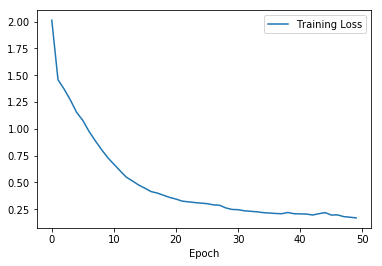

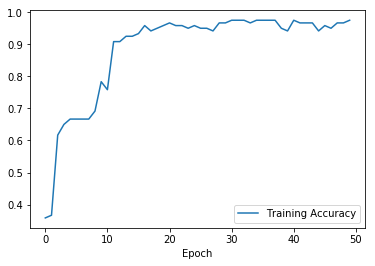

In [16]:
# 构建模型
model = Sequential()
#添加第一个隐藏层，包括10个神经元、使用relu激活函数
model.add(Dense(10,activation='relu',input_dim=4))
# 添加第二个隐藏层，包括10个神经元、使用relu激活函数、添加L2正则化
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.05), input_dim=4))
# 添加输出层，包括3个神经元（即3个类别），使用softmax激活函数
model.add(Dense(3, activation='softmax'))

# 编译模型，使用Adam优化器、分类交叉熵损失函数和精度评估指标
model.compile(optimizer=adam.Adam(learning_rate=0.008), loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train,  epochs=50, batch_size=20,verbose =1)


# 绘制训练过程中的损失和准确率变化曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
# 对新的图像进行分类预测
predictions = model.predict(x_test)

# 输出预测结果
num = 0
for i in range(len(predictions)):
    if np.argmax(predictions[i]) == y_test[i]:
        num = num + 1
print(f'test_accuracy = {num/len(predictions)}')

test_accuracy = 0.9666666666666667


# 模型3的建立、训练与测试
- 隐藏层 **1\*10+1\*10+1\*8**
- 激活函数 **relu**
- 优化算法 **Adam优化器**
- 输出层 **1\*3**
- 激活函数 **softmax**

Epoch 1/50
6/6 [==============================] - 0s 1ms/step - loss: 2.5915 - accuracy: 0.3667
Epoch 2/50
6/6 [==============================] - 0s 1ms/step - loss: 1.7586 - accuracy: 0.3667
Epoch 3/50
6/6 [==============================] - 0s 1ms/step - loss: 1.5733 - accuracy: 0.3667
Epoch 4/50
6/6 [==============================] - 0s 997us/step - loss: 1.4330 - accuracy: 0.3917
Epoch 5/50
6/6 [==============================] - 0s 1ms/step - loss: 1.3001 - accuracy: 0.4500
Epoch 6/50
6/6 [==============================] - 0s 997us/step - loss: 1.1818 - accuracy: 0.7000
Epoch 7/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0915 - accuracy: 0.6667
Epoch 8/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0058 - accuracy: 0.6667
Epoch 9/50
6/6 [==============================] - 0s 997us/step - loss: 0.9217 - accuracy: 0.7083
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.8408 - accuracy: 0.7167
Epoch 11/50
6/6 [================

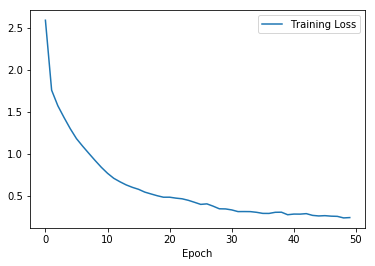

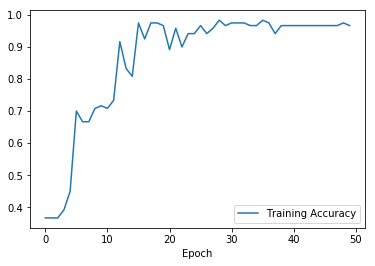

In [19]:
# 构建模型
model = Sequential()
#添加第一个隐藏层，包括10个神经元、使用relu激活函数
model.add(Dense(10,activation='relu',input_dim=4))
# 添加第二个隐藏层，包括10个神经元、使用relu激活函数、添加L2正则化
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.05), input_dim=4))
# 添加第三个隐藏层，包括8个神经元、使用relu激活函数、添加L2正则化
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
# 添加输出层，包括3个神经元（即3个类别），使用softmax激活函数
model.add(Dense(3, activation='softmax'))

# 编译模型，使用Adam优化器、分类交叉熵损失函数和精度评估指标
model.compile(optimizer=adam.Adam(learning_rate=0.008), loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train,  epochs=50, batch_size=20,verbose =1)


# 绘制训练过程中的损失和准确率变化曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [20]:
predictions = model.predict(x_test)
# 输出预测结果
num = 0
for i in range(len(predictions)):
    if np.argmax(predictions[i]) == y_test[i]:
        num = num + 1
print(f"test_accuracy ={num/len(predictions)}")

test_accuracy =0.9333333333333333


# 模型4的建立、训练与测试
- 隐藏层 **1\*10+1\*10+1\*8+1\*6**
- 激活函数 **relu**
- 优化算法 **Adam优化器**
- 输出层 **1\*3**
- 激活函数 **softmax**

Epoch 1/50
6/6 [==============================] - 0s 1ms/step - loss: 2.4981 - accuracy: 0.4000
Epoch 2/50
6/6 [==============================] - 0s 1ms/step - loss: 2.0977 - accuracy: 0.4333
Epoch 3/50
6/6 [==============================] - 0s 1ms/step - loss: 1.7809 - accuracy: 0.6667
Epoch 4/50
6/6 [==============================] - 0s 1ms/step - loss: 1.5370 - accuracy: 0.6667
Epoch 5/50
6/6 [==============================] - 0s 998us/step - loss: 1.3315 - accuracy: 0.6667
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 1.1709 - accuracy: 0.8500
Epoch 7/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0399 - accuracy: 0.7500
Epoch 8/50
6/6 [==============================] - 0s 1ms/step - loss: 0.9447 - accuracy: 0.8333
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 0.8667 - accuracy: 0.8667
Epoch 10/50
6/6 [==============================] - 0s 1ms/step - loss: 0.7969 - accuracy: 0.9583
Epoch 11/50
6/6 [====================

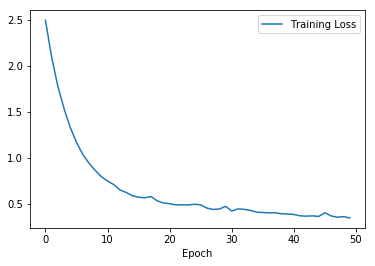

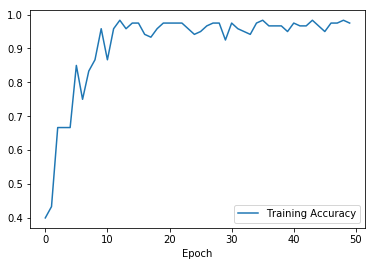

In [21]:
# 构建模型
model = Sequential()
#添加第一个隐藏层，包括10个神经元、使用relu激活函数
model.add(Dense(10,activation='relu',input_dim=4))
# 添加第二个隐藏层，包括10个神经元、使用relu激活函数、添加L2正则化
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.05), input_dim=4))
# 添加第三个隐藏层，包括8个神经元、使用relu激活函数、添加L2正则化
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
# 添加第四个隐藏层，包括6个神经元、使用relu激活函数、添加L2正则化
model.add(Dense(6, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
# 添加输出层，包括3个神经元（即3个类别），使用softmax激活函数
model.add(Dense(3, activation='softmax'))

# 编译模型，使用Adam优化器、分类交叉熵损失函数和精度评估指标
model.compile(optimizer=adam.Adam(learning_rate=0.008), loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train,  epochs=50, batch_size=20,verbose =1)


# 绘制训练过程中的损失和准确率变化曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [22]:
predictions = model.predict(x_test)
# 输出预测结果
num = 0
for i in range(len(predictions)):
    if np.argmax(predictions[i]) == y_test[i]:
        num = num + 1
print(f"test_accuracy ={num/len(predictions)}")

test_accuracy =0.9333333333333333


# 模型5的建立、训练与测试
- 隐藏层 **1\*10+1\*10+1\*8+1\*6**
- 激活函数 **tanh**
- 优化算法 **Adam优化器**
- 输出层 **1\*3**
- 激活函数 **softmax**

Epoch 1/50
6/6 [==============================] - 0s 1ms/step - loss: 2.3498 - accuracy: 0.4417
Epoch 2/50
6/6 [==============================] - 0s 1ms/step - loss: 1.9325 - accuracy: 0.7000
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 1.6837 - accuracy: 0.7083
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 1.4825 - accuracy: 0.7250
Epoch 5/50
6/6 [==============================] - 0s 1ms/step - loss: 1.3158 - accuracy: 0.7750
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 1.1808 - accuracy: 0.7917
Epoch 7/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0734 - accuracy: 0.7917
Epoch 8/50
6/6 [==============================] - 0s 1ms/step - loss: 0.9857 - accuracy: 0.7750
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 0.9158 - accuracy: 0.7917
Epoch 10/50
6/6 [==============================] - 0s 1ms/step - loss: 0.8590 - accuracy: 0.7917
Epoch 11/50
6/6 [======================

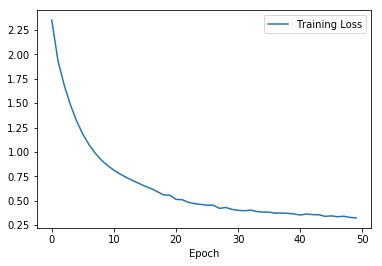

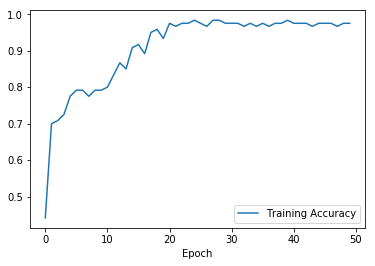

In [24]:
# 构建模型
model = Sequential()
#添加第一个隐藏层，包括10个神经元、使用relu激活函数
model.add(Dense(10,activation='tanh',input_dim=4))
# 添加第二个隐藏层，包括10个神经元、使用relu激活函数、添加L2正则化
model.add(Dense(10, activation='tanh', kernel_regularizer=regularizers.l2(0.05), input_dim=4))
# 添加第三个隐藏层，包括8个神经元、使用relu激活函数、添加L2正则化
model.add(Dense(8, activation='tanh', kernel_regularizer=regularizers.l2(0.05)))
# 添加第四个隐藏层，包括6个神经元、使用relu激活函数、添加L2正则化
model.add(Dense(6, activation='tanh', kernel_regularizer=regularizers.l2(0.05)))
# 添加输出层，包括3个神经元（即3个类别），使用softmax激活函数
model.add(Dense(3, activation='softmax'))

# 编译模型，使用Adam优化器、分类交叉熵损失函数和精度评估指标
model.compile(optimizer=adam.Adam(learning_rate=0.008), loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train,  epochs=50, batch_size=20,verbose =1)


# 绘制训练过程中的损失和准确率变化曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [25]:
predictions = model.predict(x_test)
# 输出预测结果
num = 0
for i in range(len(predictions)):
    if np.argmax(predictions[i]) == y_test[i]:
        num = num + 1
print(f"test_accuracy ={num/len(predictions)}")

test_accuracy =0.9666666666666667
